In [55]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# pandas settings
pd.set_option('display.max_columns', None)

In [20]:
# import data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_sub = pd.read_csv('data/sample.csv')

# Data Exploration

In [31]:
# pre-process columns before eda
train.columns = train.columns.str.lower().str.replace(' ', '_')

## Data Quality

In [32]:
# sneak peak
train.head()

,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,home_ownership,employment_duration,verification_status,payment_plan,loan_title,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,27628,24444,4581.004746,59,BAT3193689,7.669982,B,D5,RENT,119852.75070,Source Verified,n,Credit card refinancing,12.829794,0,1,13,0,6827,62.995136,24,f,766.083228,0.053811,2.815936,1.033134,0,INDIVIDUAL,16,0,37,577931,1532,0
1,7364,11056,8830.396394,58,BAT1930365,16.327690,B,D1,MORTGAGE,84281.32187,Source Verified,n,Credit card refinancing,25.432424,0,0,16,1,935,59.125795,25,w,32.043805,0.028226,2.651791,0.696496,0,INDIVIDUAL,100,0,21,207806,10807,1
2,34987,8339,25588.105820,59,BAT4351734,11.399787,B,B4,MORTGAGE,49335.66585,Source Verified,n,Credit card refinancing,32.658049,0,0,13,0,908,66.448301,21,f,673.862612,0.024222,2.959408,1.302545,0,INDIVIDUAL,19,0,47,132936,30065,0
3,8328,22135,10660.780130,58,BAT3461431,8.021223,C,A5,RENT,68863.94319,Source Verified,n,Major purchase,14.133686,0,0,12,0,127,26.205471,24,f,2062.056996,0.071126,1.436682,1.114770,0,INDIVIDUAL,14,0,3,184810,12715,0
4,14499,9198,10564.337500,59,BAT5525466,14.914835,C,A5,RENT,62566.94272,Verified,n,Credit card refinancing,23.524187,0,0,7,1,322,32.762515,27,f,2486.119545,0.070952,7.312951,0.925117,0,INDIVIDUAL,48,0,28,97470,27502,0


In [33]:
# data quality
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57343 entries, 0 to 57342
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_amount                   57343 non-null  int64  
 1   funded_amount                 57343 non-null  int64  
 2   funded_amount_investor        57343 non-null  float64
 3   term                          57343 non-null  int64  
 4   batch_enrolled                57343 non-null  object 
 5   interest_rate                 57343 non-null  float64
 6   grade                         57343 non-null  object 
 7   sub_grade                     57343 non-null  object 
 8   home_ownership                57343 non-null  object 
 9   employment_duration           57343 non-null  float64
 10  verification_status           57343 non-null  object 
 11  payment_plan                  57343 non-null  object 
 12  loan_title                    57343 non-null  object 
 13  d

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120 entries, 0 to 10119
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10120 non-null  int64  
 1   Loan Amount                   10120 non-null  int64  
 2   Funded Amount                 10120 non-null  int64  
 3   Funded Amount Investor        10120 non-null  float64
 4   Term                          10120 non-null  int64  
 5   Batch Enrolled                10120 non-null  object 
 6   Interest Rate                 10120 non-null  float64
 7   Grade                         10120 non-null  object 
 8   Sub Grade                     10120 non-null  object 
 9   Home Ownership                10120 non-null  object 
 10  Employment Duration           10120 non-null  float64
 11  Verification Status           10120 non-null  object 
 12  Payment Plan                  10120 non-null  object 
 13  L

**No null values for either dataset**

## Target Variable

Text(0.5, 1.0, 'Loan Status counts for training dataset')

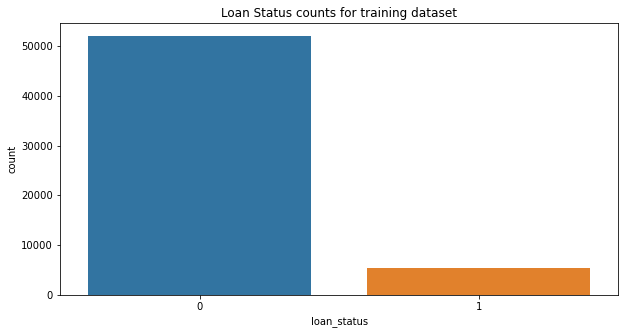

In [77]:
figure, axes = plt.subplots(figsize=(10,5))
sn.countplot(data=train, x='loan_status', ax=axes)
axes.set_title('Loan Status counts for training dataset')

**Heavily imbalanced target variable distribution: lots more people did NOT default in this training dataset**

## Feature Exploration

Features which look the most promising on the surface are:

- Loan amount
- Interest rate
- Home Ownership
- Grade and/or Sub Grade
- Delinquency - two years

### Loan Amount

In [45]:
bins = np.arange(0,40000, 1000)

Text(0.5, 1.0, 'Histogram of Loan Amount')

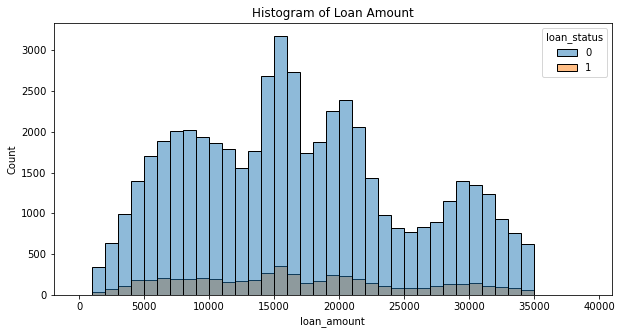

In [68]:
# compare loan amount for both target values
figure, axes = plt.subplots(figsize=(10,5))
sn.histplot(data=train, x='loan_amount', hue='loan_status', bins=bins, ax=axes)
axes.set_title('Histogram of Loan Amount')

**There does not look like a major difference in the distribution of loan amount between default groups**

### Interest Rate

In [83]:
train.groupby('loan_status')['interest_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,52002.0,11.849864,3.712246,5.320006,9.310131,11.380877,14.196624,27.182348
1,5341.0,11.868262,3.785929,5.323521,9.280828,11.378096,14.197074,26.307264


<AxesSubplot:xlabel='interest_rate', ylabel='Count'>

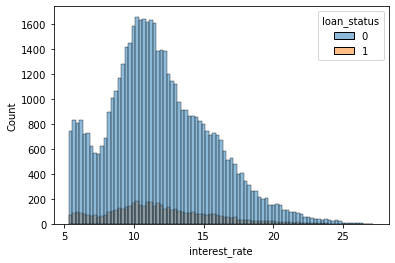

In [81]:
sn.histplot(data=train, x='interest_rate', hue='loan_status')

**No strong evidence of a relationship between interest rate and loan status.**

### Home Ownership

In [94]:
train.groupby('home_ownership')['loan_status'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
MORTGAGE,30905.0,0.088756,0.284396,0.0,0.0,0.0,0.0,1.0
OWN,5892.0,0.103870,0.305117,0.0,0.0,0.0,0.0,1.0
RENT,20546.0,0.096661,0.295503,0.0,0.0,0.0,0.0,1.0


**There is a potential association between home ownership and loan status, we can gather further evidence of this using a chi2 test.**

#### Chi2 test

- Null hypothesis: there is no association between home ownership and loan status
- Alternative hypothesis: home ownership is associated with loan status

In [104]:
# contingency table
home_cont = pd.crosstab(index=train['home_ownership'], columns=train['loan_status'])
home_cont

loan_status,0,1
home_ownership,,
MORTGAGE,28162,2743
OWN,5280,612
RENT,18560,1986


In [113]:
# totals
n = home_cont.values.sum(axis=None)
row_totals = home_cont.sum(axis='columns')
col_totals = home_cont.sum(axis='rows')

In [129]:
# expected frequency table
home_exp = np.outer(row_totals, col_totals)/n
print('This is what we would expect if home ownership was not associated with loan status:', '\n\n',  pd.DataFrame(data=home_exp, index=home_cont.index, columns=home_cont.columns))

This is what we would expect if home ownership was not associated with loan status: 

 loan_status                0            1
home_ownership                           
MORTGAGE        28026.468967  2878.531033
OWN              5343.211621   548.788379
RENT            18632.319411  1913.680589


In [139]:
# calculate chi-squared statistic
chi2_stat = np.sum((home_cont.to_numpy() - home_exp)**2 / home_exp)

# degrees of freedom
dof = (home_cont.shape[0] - 1) * (home_cont.shape[1] - 1)

print('Our Chi2 statistic is:', chi2_stat, 'and our degrees of freedom is:', dof)

Our Chi2 statistic is: 18.079146160153083 and our degrees of freedom is: 2


Our p-value is: 0.00011862146751373537 . Given this is less that 0.05, what we are saying is that the frequencies we observed would be extremely unlikely if the variables were independent. This means we have enough evidence to reject this null hypothesis and conclude that there is a significant association between a home ownership and loan status.


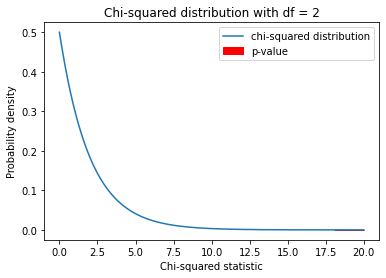

In [140]:
from scipy.stats import chi2

# calculate the p-value
p_value = 1 - chi2.cdf(x=chi2_stat, df=dof)
print('Our p-value is:', p_value, '. Given this is less that 0.05, what we are saying',
      'is that the frequencies we observed would be extremely unlikely if the variables were independent.', 
      'This means we have enough evidence to reject this null hypothesis and conclude that there is a significant',
      'association between a home ownership and loan status.')

# Define the x-axis values for the plot
x = np.linspace(0, 20, 1000)

# Calculate the y-axis values for the chi-squared distribution
y = chi2.pdf(x, dof)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the chi-squared distribution
ax.plot(x, y, label='chi-squared distribution')

# Shade the area to the right of the observed chi-squared statistic
ax.fill_between(x, 0, y, where=x >= chi2_stat, label='p-value', color='red', alpha=1)

# Set the axis labels and title
plt.xlabel('Chi-squared statistic')
plt.ylabel('Probability density')
plt.title('Chi-squared distribution with df = {}'.format(dof))
plt.legend()

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [141]:
# calculate the effect size (Cramer's V)
n = home_cont.sum().sum()
phi_coef = np.sqrt(chi2_stat/n)
v = phi_coef/np.sqrt(min(home_cont.shape)-1)
print('Effect size (using Cramer\'s V value) is:', v, '\n\n', 'Cramer\'s value is between 0 (weak association) and 1 (perfect association).', 'While the chi-squared test indicated a significant association between home ownership and loan status, the effect size suggests that the strength of the association is very weak. This means that even though the two variables are not independent of each other, the association is not practically significant and not be useful in predicting loan defaults.')

Effect size (using Cramer's V value) is: 0.017756147860579115 

 Cramer's value is between 0 (weak association) and 1 (perfect association). While the chi-squared test indicated a significant association between home ownership and loan status, the effect size suggests that the strength of the association is very weak. This means that even though the two variables are not independent of each other, the association is not practically significant and not be useful in predicting loan defaults.


### Grade and Sub Grade

In [143]:
# grade
train.groupby('grade')['loan_status'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,10240.0,0.091504,0.288338,0.0,0.0,0.0,0.0,1.0
B,15913.0,0.087664,0.282815,0.0,0.0,0.0,0.0,1.0
C,16231.0,0.095003,0.293229,0.0,0.0,0.0,0.0,1.0
D,7031.0,0.096715,0.295590,0.0,0.0,0.0,0.0,1.0
E,5491.0,0.097250,0.296325,0.0,0.0,0.0,0.0,1.0
F,1911.0,0.102041,0.302781,0.0,0.0,0.0,0.0,1.0
G,526.0,0.110266,0.313519,0.0,0.0,0.0,0.0,1.0


In [144]:
# sub-grade
train.groupby('sub_grade')['loan_status'].describe()

,count,mean,std,min,25%,50%,75%,max
sub_grade,,,,,,,,
A1,1124.0,0.090747,0.287377,0.0,0.0,0.0,0.0,1.0
A2,1567.0,0.097639,0.296920,0.0,0.0,0.0,0.0,1.0
A3,1431.0,0.092942,0.290453,0.0,0.0,0.0,0.0,1.0
A4,1925.0,0.092987,0.290490,0.0,0.0,0.0,0.0,1.0
A5,3017.0,0.093470,0.291139,0.0,0.0,0.0,0.0,1.0
B1,2481.0,0.100363,0.300544,0.0,0.0,0.0,0.0,1.0
B2,3041.0,0.087471,0.282571,0.0,0.0,0.0,0.0,1.0
B3,3379.0,0.083753,0.277057,0.0,0.0,0.0,0.0,1.0
B4,3820.0,0.092932,0.290375,0.0,0.0,0.0,0.0,1.0


**The mean value for loan status does increase as we go down the grades and sub-grades, let's test this with a chi2 test**

#### Chi2 Test

- Null hypothesis: there is no association between grade and loan status.
- Alternative hypothesis: there is an association between grade and loan status.

In [147]:
# contingency table
grade_cont = pd.crosstab(train['grade'], train['loan_status'])
grade_cont

loan_status,0,1
grade,,
A,9303,937
B,14518,1395
C,14689,1542
D,6351,680
E,4957,534
F,1716,195
G,468,58


In [158]:
# totals
n = grade_cont.values.sum()
row_totals = grade_cont.sum(axis='columns')
col_totals = grade_cont.sum(axis='rows')

# expected frequency table
grade_exp = np.outer(row_totals, col_totals)/n

print('Our expected frequency table is: \n\n', pd.DataFrame(data=grade_exp, index=grade_cont.index, columns=grade_cont.columns))

Our expected frequency table is: 

 loan_status             0            1
grade                                 
A             9286.233368   953.766632
B            14430.842928  1482.157072
C            14719.224003  1511.775997
D             6376.123712   654.876288
E             4979.561272   511.438728
F             1733.007028   177.992972
G              477.007691    48.992309


In [166]:
# chi2 statistic
chi2_grade = np.sum((grade_cont.to_numpy()-grade_exp)**2/grade_exp)

# degrees of freedom
dof_grade = (grade_cont.shape[0]-1)*(grade_cont.shape[1]-1)

print('Our chi2 statistic is:', chi2_grade, 'and our degrees of freedom is:', dof_grade)

Our chi2 statistic is: 12.421394429832453 and our degrees of freedom is: 6


Our p-value is: 0.05320181409116065 . What this says is that there is a 5.3% probability of observing the frequencies we have assuming the variables are independent. This is not enough evidence to reject this null hypothesis at the 95% confidence level. But, given this is close to being 
 in the critical region, we can continue and calculat the effect size is to determine the strength of the potential association between the two variables.


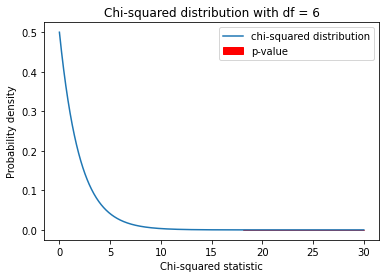

In [171]:
from scipy.stats import chi2

# calculate the p-value
p_value = 1 - chi2.cdf(x=chi2_grade, df=dof_grade)
print('Our p-value is:', p_value, '. What this says',
      'is that there is a 5.3% probability of observing the frequencies we have assuming the variables are independent.', 
      'This is not enough evidence to reject this null hypothesis at the 95% confidence level. But, given this is close to being \n',
      'in the critical region, we can continue and calculat the effect size is to determine the strength of the potential association between the two variables.')

# Define the x-axis values for the plot
x = np.linspace(0, 30, 1000)

# Calculate the y-axis values for the chi-squared distribution
y = chi2.pdf(x, dof)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the chi-squared distribution
ax.plot(x, y, label='chi-squared distribution')

# Shade the area to the right of the observed chi-squared statistic
ax.fill_between(x, 0, y, where=x >= chi2_stat, label='p-value', color='red', alpha=1)

# Set the axis labels and title
plt.xlabel('Chi-squared statistic')
plt.ylabel('Probability density')
plt.title('Chi-squared distribution with df = {}'.format(dof_grade))
plt.legend()

# Add a legend
ax.legend()

# Show the plot
plt.show()